# ImageNet Data Property Collection

In [1]:
import torch
from torchvision import datasets, transforms
import os

In [2]:
data_dir = os.path.dirname(os.path.abspath('')) + '\data\imagenet'
batch_size_train = 32
batch_size_test = 64
print('Using data dir:', data_dir)

Using data dir: D:\Workspace\git\active\VisionNETs\data\imagenet


In [3]:
tfs = transforms.Compose([transforms.Resize(256),
                          transforms.CenterCrop(224),
                          transforms.ToTensor()])

train_data = datasets.ImageNet(data_dir,
                            split='train',
                            transform=tfs
                            )

test_data = datasets.ImageNet(data_dir,
                           split='val',
                           transform=tfs
                           )

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size_test, 
                                          shuffle=True)

## Example of dataset image

Label: tensor(688)
Shape: torch.Size([224, 224, 3])


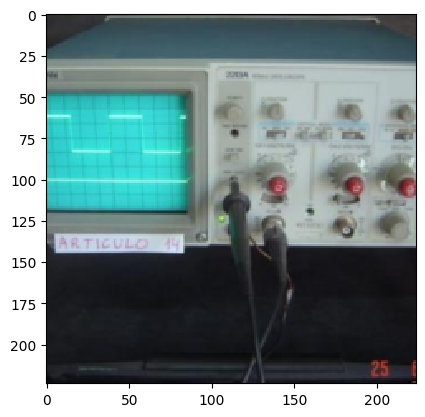

In [4]:
import matplotlib.pyplot as plt
example_data, labels = next(iter(test_loader))
sample = example_data[0].permute(1, 2, 0)
# show the data
plt.imshow(sample, interpolation='nearest')
print("Label:", str(labels[0]))
print("Shape:", sample.shape)

## Mean and Variance
https://gist.github.com/JorritWillaert/2cae1da8cd42226a184f0268c0cb58f8#file-get_mean_and_std-py

In [ ]:
channels_sum, channels_squared_sum, num_batches = 0, 0, 0
for data, _ in train_loader:
    # Mean over batch, height and width, but not over the channels
    channels_sum += torch.mean(data, dim=[0,2,3])
    channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
    num_batches += 1

mean = channels_sum / num_batches

# std = sqrt(E[X^2] - (E[X])^2)
std = (channels_squared_sum / num_batches - mean ** 2) ** 0.5
print("Mean:", mean)
print("Std:", std)

## Shape
For the MLP model, we flatten the image

In [ ]:
data, _ = next(iter(test_loader))
MLP_shape = data.view(*data.shape[:1], -1)
print(data.shape)
print(MLP_shape.shape)